<a href="https://colab.research.google.com/github/antonio2505/Data_Science_Business_CS/blob/main/K_Nearest_Neighbours_for_T_shirt_size_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CODE TO PERFORM CLASSIFICATION USING K-NEAREST NEIGHBORS
# Mr. Kassi Antoine



# PROBLEM STATEMENT

You own an online clothing business and you would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. Features are height and weight and output is either L (Large) or S (Small). 

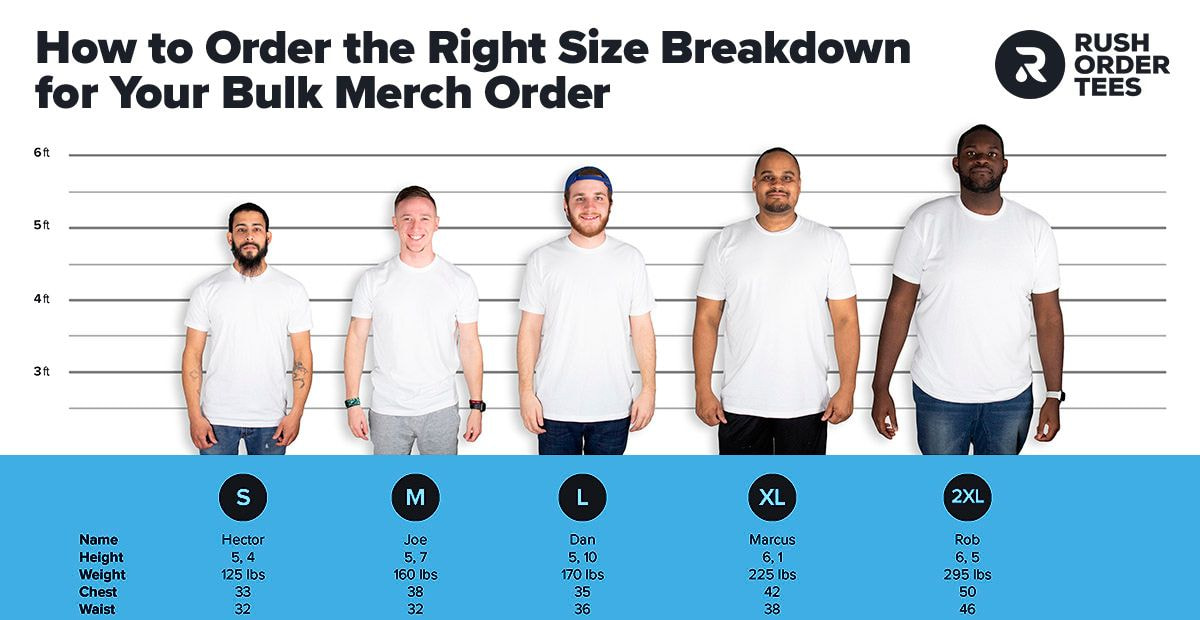

DATA SOURCE: https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html

# STEP#0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP#1: IMPORT DATASET

In [2]:
from google.colab import files
file = files.upload()

Saving Tshirt_Sizing_Dataset.csv to Tshirt_Sizing_Dataset.csv


In [3]:
tshirt = pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [4]:
tshirt

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [5]:
tshirt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Height (in cms)  18 non-null     int64 
 1   Weight (in kgs)  18 non-null     int64 
 2   T Shirt Size     18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [6]:
tshirt.describe()

,Height (in cms),Weight (in kgs)
count,18.00000,18.000000
mean,164.00000,62.333333
std,4.32503,2.634611
min,158.00000,58.000000
25%,160.00000,60.250000
50%,164.00000,62.500000
75%,168.00000,64.000000
max,170.00000,68.000000


# STEP#2: CREATE TESTING AND TRAINING DATASET

In [8]:
tshirt.head(2)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S


In [14]:
x = tshirt.iloc[ : , 0 : 2].values

In [15]:
x

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]])

In [18]:
y = tshirt.iloc[:,2].values

In [19]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [23]:
y = tshirt['T Shirt Size'].apply(lambda x: 1 if x == 'S' else 0).values

In [24]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [35]:
x_test.shape

(5, 2)

In [36]:
x_train.shape

(13, 2)

# STEP#3: MODEL TRAINING

In [37]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# STEP#4: MODEL TESTING

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
y_pred

array([1, 1, 0, 1, 0])

In [40]:
y_test

array([1, 1, 0, 1, 0])

# STEP#5: TESTING RESULTS VISUALIZATION

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

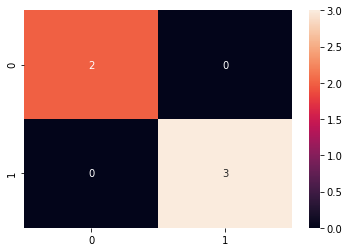

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# VISUALIZE TRAINING SET RESULTS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


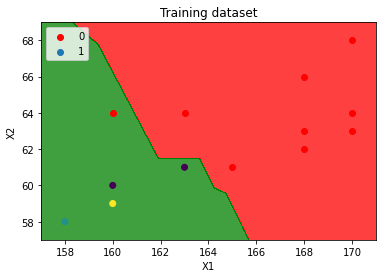

In [45]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# VISUALIZE TEST SET RESULTS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


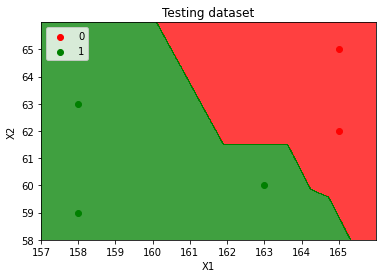

In [44]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Testing dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# EXCELLENT JOB! NOW YOU'VE BECOME EXPERT IN K NEAREST NEIGHBORS, YOU SHOULD BE READY FOR EXERCISES :)